In [1]:
# Data Source: https://www.kaggle.com/tmdb/tmdb-movie-metadata/data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# view the dataframe
movies_df = pd.read_csv('tmdb_5000_movies.csv')
print(movies_df.shape)
movies_df.head()


(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
# drop the unnecessary attributes of the dataframe

del_col_list = ['homepage', 'keywords', 'id','status', 'original_language', 'overview', 'tagline',  
                 'production_companies', 'title']

movies_df = movies_df.drop(del_col_list, axis=1)
movies_df.head()


,budget,genres,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124


In [5]:
# remove instances which have duplicates from the dataset if there are any
movies_df = movies_df.drop_duplicates(keep ='first')
print(movies_df.shape)


(4803, 11)


In [6]:
# delete any instance that has budget OR revenue less than 1000 dollars
# reminder for new panda users: The operators are: | for or, & for and, and ~ for not.

# locate those instances
indices_to_delete = movies_df[(movies_df['budget'] < 1000) | (movies_df['revenue'] < 1000)].index 

# delete these row indexes from dataFrame
movies_df.drop(indices_to_delete , inplace=True)
print(movies_df.shape)


(3211, 11)


In [7]:
# replace all the zeros with NAN anywhere it is seen 0

cols = movies_df.keys() # all attributes (all columns)
movies_df[cols] = movies_df[cols].replace(0, np.nan) # replace(replace where you see this value, with this value)

# drop all the instances if an instance has NAN in any of its attibute.
movies_df.dropna(subset = cols, inplace=True)
print(movies_df.shape)



(3209, 11)


In [8]:
# there are too many different data types in the dataframe 

# first change the format to datetime for the release_date attribute
movies_df.release_date = pd.to_datetime(movies_df['release_date']) # converted 2009-12-10 to 2009-12-10 00:00:00

# extract the release year from  release date
movies_df['release_date'] = movies_df['release_date'].dt.year

# rename the column
movies_df.rename(columns = {"release_date": "release_year"}, inplace = True)


                 

In [9]:
# if release year attribute is not needed, drop it:
# movies_df = movies_df.drop(['release_year'], axis=1)

In [10]:
# Changing the data type of the below mentioned columns as well
change_cols = ['budget', 'revenue', 'runtime', 'popularity', 'vote_count']

# changing their data type
movies_df[change_cols] = movies_df[change_cols].applymap(np.int64)
print(movies_df.dtypes)

budget                    int64
genres                   object
original_title           object
popularity                int64
production_countries     object
release_year              int64
revenue                   int64
runtime                   int64
spoken_languages         object
vote_average            float64
vote_count                int64
dtype: object


In [11]:
# view the json objects in the data
view_full_string_of_genres  = movies_df.loc[0, ['genres']]
print(view_full_string_of_genres)


genres    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: 0, dtype: object


    # Reminder: getting around with json files in the dataframe
    import json

    x = '{ "name":"X", "value": 30, "location":"New York"}' 
    print(x, type(x))

    y = json.loads(x) # json.loads() takes in a string and returns a json object / dictinoary
    print(y, type(y), y["value"], type(y["value"])) # it is possible to access to the keys and values like it is in dict.

    to_string = json.dumps(y) # json.dumps() takes in a json object or dict. and returns a string.
    print(to_string, type(to_string))


In [12]:
# there are columns which are in json format 
# flatten those json objects and extract the important features
# example: genre is: [{"id": 28, "name": "Action"}, {"id": 12, "name":....] it is a NESTED json object 

def flatten_json(attribute):

    for index, nested_json_str in zip(movies_df.index, movies_df[attribute].apply(json.loads)):
        list1=[]
        for each_item in range(len(nested_json_str)):
            list1.append((nested_json_str[each_item]['name']))# the key 'name' contains the name of the genre
        movies_df.loc[index, attribute] = str(list1)[1:-1] # it is stored as string and not as s list, remove []

flatten_json('genres')
    
movies_df.tail()

,budget,genres,original_title,popularity,production_countries,release_year,revenue,runtime,spoken_languages,vote_average,vote_count
4773,27000,'Comedy',Clerks,19,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994,3151130,92,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.4,755
4788,12000,"'Horror', 'Comedy', 'Crime'",Pink Flamingos,4,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972,6000000,93,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.2,110
4792,20000,"'Crime', 'Horror', 'Mystery', 'Thriller'",キュア,0,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997,99000,111,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",7.4,63
4796,7000,"'Science Fiction', 'Drama', 'Thriller'",Primer,23,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004,424760,77,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,658
4798,220000,"'Action', 'Crime', 'Thriller'",El Mariachi,14,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992,2040920,81,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",6.6,238


In [13]:
# the production countries can simply be put with their abbreviations

# production country format is: [{"iso_3166_1": "US", "name": "United States o...
# extract "iso_3166_1" information

for index, nested_json_str in zip(movies_df.index, movies_df['production_countries'].apply(json.loads)):
    list1=[]
    for each_item in range(len(nested_json_str)):
        list1.append((nested_json_str[each_item]['iso_3166_1']))# the key 'name' contains the name of the genre
    movies_df.loc[index, 'production_countries'] = str(list1)[1:-1]
    

movies_df.head()

,budget,genres,original_title,popularity,production_countries,release_year,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"'Action', 'Adventure', 'Fantasy', 'Science Fic...",Avatar,150,"'US', 'GB'",2009,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,300000000,"'Adventure', 'Fantasy', 'Action'",Pirates of the Caribbean: At World's End,139,'US',2007,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500
2,245000000,"'Action', 'Adventure', 'Crime'",Spectre,107,"'GB', 'US'",2015,880674609,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466
3,250000000,"'Action', 'Crime', 'Drama', 'Thriller'",The Dark Knight Rises,112,'US',2012,1084939099,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106
4,260000000,"'Action', 'Adventure', 'Science Fiction'",John Carter,43,'US',2012,284139100,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124


In [14]:
# clean up the spoken languages attribute

for index, nested_json_str in zip(movies_df.index, movies_df['spoken_languages'].apply(json.loads)):
    list_of_spoken_lang =[]
    for each_item in range(len(nested_json_str)):
        list_of_spoken_lang.append((nested_json_str[each_item]['name']))
    movies_df.loc[index, 'spoken_languages'] = str(list_of_spoken_lang)[1:-1]

movies_df.head()

,budget,genres,original_title,popularity,production_countries,release_year,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"'Action', 'Adventure', 'Fantasy', 'Science Fic...",Avatar,150,"'US', 'GB'",2009,2787965087,162,"'English', 'Español'",7.2,11800
1,300000000,"'Adventure', 'Fantasy', 'Action'",Pirates of the Caribbean: At World's End,139,'US',2007,961000000,169,'English',6.9,4500
2,245000000,"'Action', 'Adventure', 'Crime'",Spectre,107,"'GB', 'US'",2015,880674609,148,"'Français', 'English', 'Español', 'Italiano', ...",6.3,4466
3,250000000,"'Action', 'Crime', 'Drama', 'Thriller'",The Dark Knight Rises,112,'US',2012,1084939099,165,'English',7.6,9106
4,260000000,"'Action', 'Adventure', 'Science Fiction'",John Carter,43,'US',2012,284139100,132,'English',6.1,2124


In [15]:
# change the order of the columns for a better view where the attributes related to each other are near to each other

movies_df = movies_df[['original_title','vote_average','vote_count','popularity','genres', 'runtime',
                       'revenue', 'budget', 'release_year', 'spoken_languages', 'production_countries']]

movies_df.head()


,original_title,vote_average,vote_count,popularity,genres,runtime,revenue,budget,release_year,spoken_languages,production_countries
0,Avatar,7.2,11800,150,"'Action', 'Adventure', 'Fantasy', 'Science Fic...",162,2787965087,237000000,2009,"'English', 'Español'","'US', 'GB'"
1,Pirates of the Caribbean: At World's End,6.9,4500,139,"'Adventure', 'Fantasy', 'Action'",169,961000000,300000000,2007,'English','US'
2,Spectre,6.3,4466,107,"'Action', 'Adventure', 'Crime'",148,880674609,245000000,2015,"'Français', 'English', 'Español', 'Italiano', ...","'GB', 'US'"
3,The Dark Knight Rises,7.6,9106,112,"'Action', 'Crime', 'Drama', 'Thriller'",165,1084939099,250000000,2012,'English','US'
4,John Carter,6.1,2124,43,"'Action', 'Adventure', 'Science Fiction'",132,284139100,260000000,2012,'English','US'


    # The data looks clean and ready to analyze. Export the data to use it for analysis
    # Format: df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')
    movies_df.to_csv(r'clean_movie_dataset')
    # open a new notebook and import the cleaned dataset 
    df = pd.read_csv('clean_movie_dataset')
    df = df.drop(['Unnamed: 0'], axis = 1) # delete the additional first attribute added automatically
    # or continue below

In [16]:
df = movies_df

In [17]:
# Analyze the data

popular_movies_df = df.sort_values(by ='popularity', ascending=False)
popular_movies_df.head()

,original_title,vote_average,vote_count,popularity,genres,runtime,revenue,budget,release_year,spoken_languages,production_countries
546,Minions,6.4,4571,875,"'Family', 'Animation', 'Adventure', 'Comedy'",91,1156730962,74000000,2015,'English','US'
95,Interstellar,8.1,10867,724,"'Adventure', 'Drama', 'Science Fiction'",169,675120017,165000000,2014,'English',"'CA', 'US', 'GB'"
788,Deadpool,7.4,10995,514,"'Action', 'Adventure', 'Comedy'",108,783112979,58000000,2016,'English','US'
94,Guardians of the Galaxy,7.9,9742,481,"'Action', 'Science Fiction', 'Adventure'",121,773328629,170000000,2014,'English',"'GB', 'US'"
127,Mad Max: Fury Road,7.2,9427,434,"'Action', 'Adventure', 'Science Fiction', 'Thr...",120,378858340,150000000,2015,'English',"'AU', 'US'"


In [18]:
# take the index at best value under 'vote_average column
top = df['vote_average'].idxmax() # brings the ID of the max vote_average instance
top_voted = df.loc[top]
# create a new data frame
top_df = pd.DataFrame(top_voted)

# take the index at lowest value under 'vote_average' column
bottom = df['vote_average'].idxmin() # brings the ID of the min vote-average instance
bottom_voted = df.loc[bottom]
# create a new data frame
bottom_df = pd.DataFrame(bottom_voted)


# concatenate the best instance and worst instance on axis 1
best_and_worst_movies = pd.concat([top_df, bottom_df], axis=1) # concatenate side by side
# change the column names
best_and_worst_movies.columns= ["best_voted", "worst_voted"]
# view the new data frame
best_and_worst_movies

,best_voted,worst_voted
original_title,The Shawshank Redemption,Foodfight!
vote_average,8.5,2.3
vote_count,8205,28
popularity,136,5
genres,"'Drama', 'Crime'","'Animation', 'Action', 'Comedy', 'Family'"
runtime,142,87
revenue,28341469,73706
budget,25000000,65000000
release_year,1994,2012
spoken_languages,'English','English'


In [19]:
# create a new attribute 'profit'

df['profit'] = df['revenue'] - df['budget']

df = df[['original_title','vote_average','vote_count','popularity','genres', 'runtime',
        'revenue', 'budget', 'profit', 'release_year', 'spoken_languages', 'production_countries']]


In [20]:
# to find the most talked about movies, we can sort the dataframe on the popularity column
popular_movies_df = df.sort_values(by ='profit', ascending=False).head() # descending order
popular_movies_df.head()

,original_title,vote_average,vote_count,popularity,genres,runtime,revenue,budget,profit,release_year,spoken_languages,production_countries
0,Avatar,7.2,11800,150,"'Action', 'Adventure', 'Fantasy', 'Science Fic...",162,2787965087,237000000,2550965087,2009,"'English', 'Español'","'US', 'GB'"
25,Titanic,7.5,7562,100,"'Drama', 'Romance', 'Thriller'",194,1845034188,200000000,1645034188,1997,"'English', 'Français', 'Deutsch', 'svenska', '...",'US'
28,Jurassic World,6.5,8662,418,"'Action', 'Adventure', 'Science Fiction', 'Thr...",124,1513528810,150000000,1363528810,2015,'English','US'
44,Furious 7,7.3,4176,102,'Action',137,1506249360,190000000,1316249360,2015,'English',"'JP', 'US'"
16,The Avengers,7.4,11776,144,"'Science Fiction', 'Action', 'Adventure'",143,1519557910,220000000,1299557910,2012,'English','US'


In [21]:
print(df['runtime'].mean().round(1)) # Average runtime of movies by minutes
print(df['profit'].mean().round(2)) # Average profit of movies 

110.8
81104839.85


In [22]:
# movies rated above 8
print('# of movies rated above 8:', len(df[df['vote_average'] >= 8.0]))
print('# of movies above average rating:', len(df[df['vote_average'] >= df['vote_average'].mean()]))
print('total # of movies being analyzed:', len(df))

# of movies rated above 8: 60
# of movies above average rating: 1596
total # of movies being analyzed: 3209


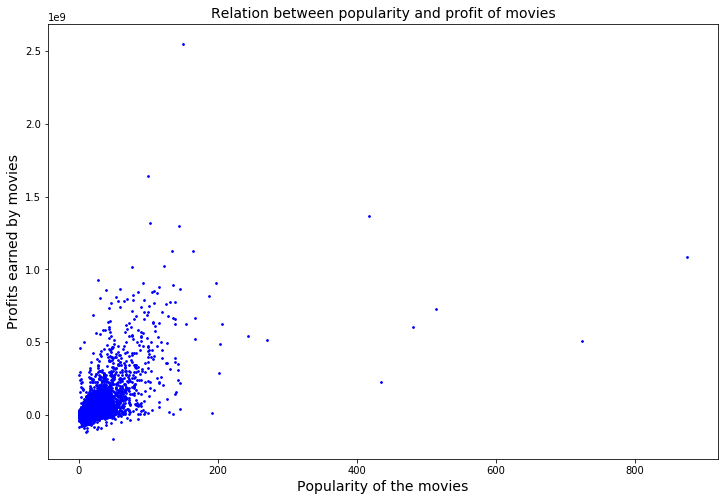

In [23]:
# compare profit and popularity
# Option 1:
# to visualize popularity_vs_profit as bars = df.groupby('popularity')['profit'].sum() and put it in a plt.plot

# Option 2:
# fig, ax = plt.subplots()
# df.plot(kind ='scatter', x = 'popularity', y = 'profit', ax=ax) 
# if grids don't appear: 
# ax.grid()


# Option 3:
plt.rcParams['figure.figsize'] = [12, 8]

# popularity vs profit chart
plt.scatter(df['popularity'], df['profit'], color = 'blue', s = 3)

plt.xlabel('Popularity of the movies', fontsize = 14)
plt.ylabel('Profits earned by movies', fontsize = 14)
plt.title('Relation between popularity and profit of movies', fontsize = 14)
plt.show()

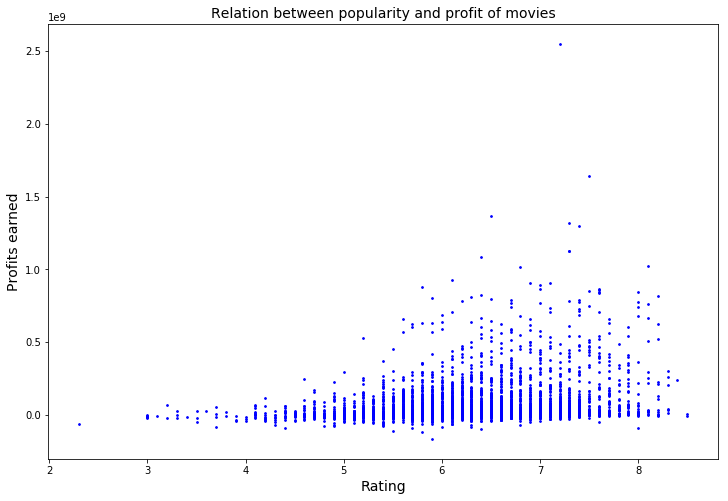

In [24]:
# to rating vs popularity chart
# fig, ax = plt.subplots()
# df.plot(kind ='scatter', x = 'vote_average', y = 'profit', ax=ax) 
#     - 'line' : line plot (default)
#     - 'bar' : vertical bar plot
#     - 'barh' : horizontal bar plot
#     - 'hist' : histogram
#     - 'box' : boxplot
#     - 'kde' : Kernel Density Estimation plot
#     - 'density' : same as 'kde'
#     - 'area' : area plot
#     - 'pie' : pie plot
#     - 'scatter' : scatter plot
#     - 'hexbin' : hexbin plot



plt.rcParams['figure.figsize'] = [12, 8]

# popularity vs profit chart
plt.scatter(df['vote_average'], df['profit'], color = 'blue', s = 3)

plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Profits earned', fontsize = 14)
plt.title('Relation between popularity and profit of movies', fontsize = 14)
plt.show()

Text(0,0.5,'Genres')

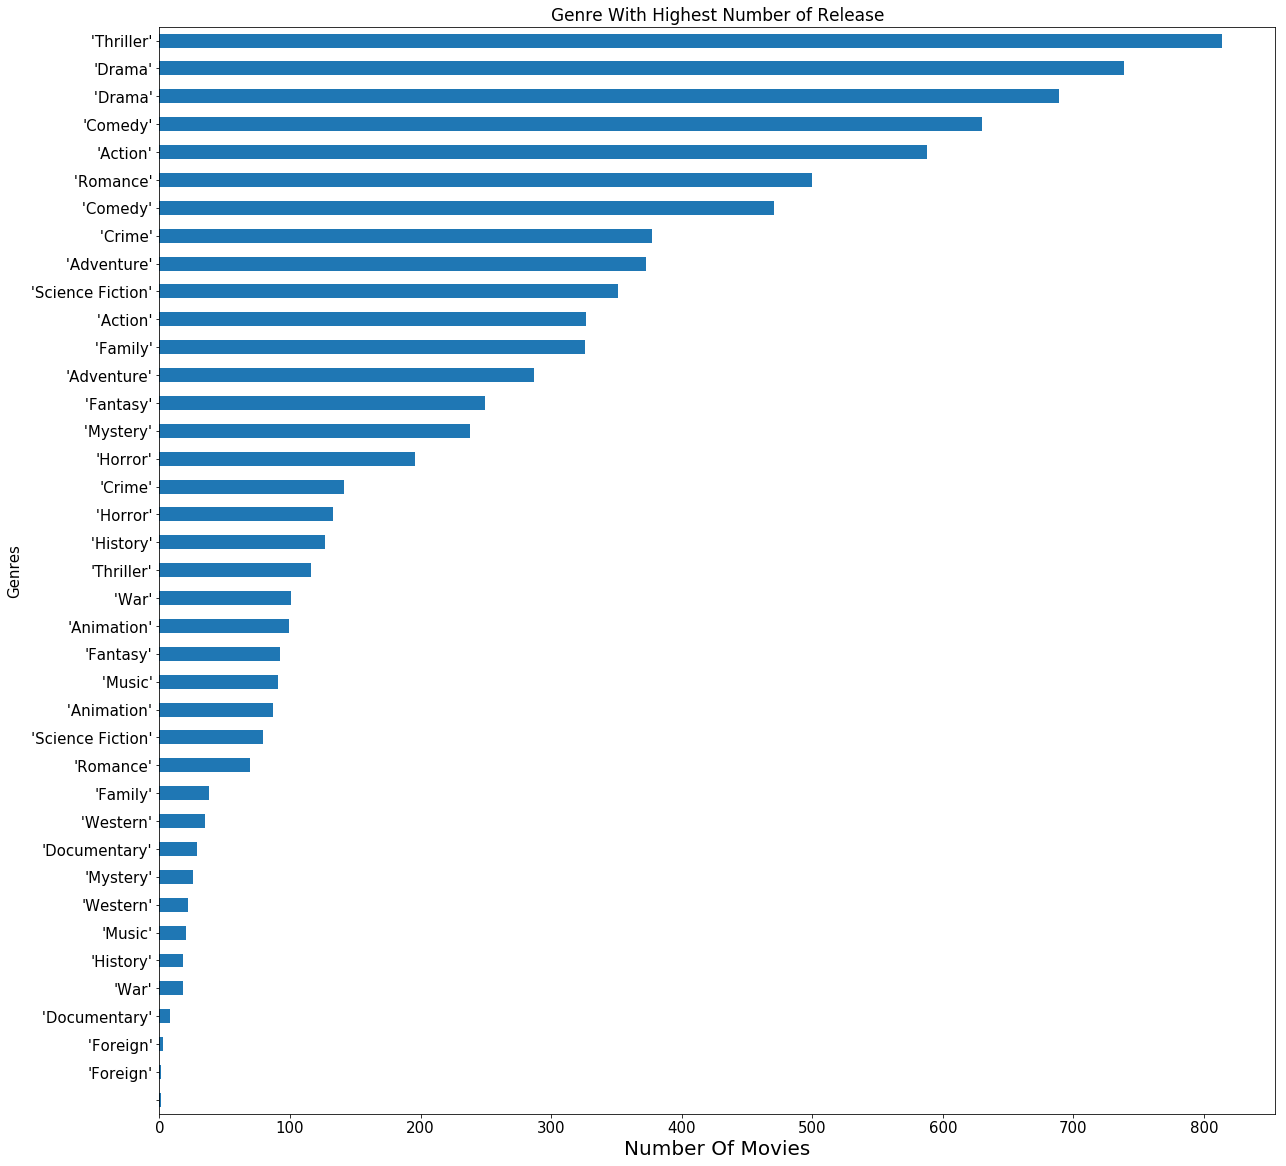

In [25]:
# compare the vote averages for each genre to see which genres bring more vote. 
# since most movies have multiple genres, extract all genres

# if genres were singly put, to list unique values in the df['name'] column, df.genres.unique() would be sufficient


# concatenate all the rows of the genres
sum_all_genres_str =  df['genres'].str.cat(sep = ',') # create a string that has all strings with seperation ','
# print(len(data_plot)) would yield: 89291 characters

# turn the large string into a panda series
data = pd.Series(sum_all_genres_str.split(',')) 
# print(data[:15])  view the data
# print(len(data))  would yield: 8509 words in one column 

# count the appearance of each genre and add it to the pd series in an ascending order
genre_count = data.value_counts(ascending= True)
# print(total_genre_movies[:5]) would yield a series like: 'Thriller'    814 , 'Drama'        739 ,....

#plot a 'barh' plot 
genre_count.plot(kind= 'barh', figsize = (20,20), fontsize=15)

plt.title("Genre With Highest Number of Release",fontsize=17)
plt.xlabel('Number Of Movies',fontsize=20)
plt.ylabel("Genres",fontsize= 15)
